# Greedy Heuristics

Made in pairs by Andrei Kulchyk (155489) and Fiodar Piatrovich (155174).

## Description of a problem

We are given three columns of integers with a row for each node. The first two columns contain x and y coordinates of the node positions in a plane. The third column contains node costs. The goal is to select exactly 50% of the nodes (if the number of nodes is odd we round the number of nodes to be selected up) and form a Hamiltonian cycle (closed path) through this set of nodes such that the sum of the total length of the path plus the total cost of the selected nodes is minimized.

The distances between nodes are calculated as Euclidean distances rounded mathematically to
integer values. The distance matrix should be calculated just after reading an instance and then only
the distance matrix (no nodes coordinates) should be accessed by optimization methods to allow
instances defined only by distance matrices.

In [49]:
## Implementation

In [1]:
%load_ext autoreload
%autoreload 2

In [51]:
### Dependencies

In [2]:
from dotenv import load_dotenv

_ = load_dotenv()

In [3]:
import random
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from hamiltonian_cycle.costs import (
    dm,
)
from hamiltonian_cycle.experiment import perform_experiment
from hamiltonian_cycle.algorithms.lab2 import (
    init_greedy_2regret_cycle,
    init_greedy_2regret_weighted_cycle,
)
from hamiltonian_cycle.algorithms.lab1 import (
    init_nearest_neighbor_best_position,
    init_nearest_neighbor_end,
    init_random_solution,
    init_greedy_cycle,
)

import warnings

In [4]:
plt.style.use("ggplot")

In [5]:
SEED: int = 369_420

random.seed(SEED)
np.random.seed(SEED)

In [6]:
### Read Data

In [7]:
def read_dataset_csv(csv_path: Path) -> pd.DataFrame:
    return pd.read_csv(csv_path, sep=";", names=["x", "y", "cost"])


DATA_DIR = Path("../data").resolve()

ds_a = read_dataset_csv(DATA_DIR / "TSPA.csv")
ds_b = read_dataset_csv(DATA_DIR / "TSPB.csv")

dm_a = dm(ds_a)
dm_b = dm(ds_b)

# Algorithms

## Random Solution

$$
\begin{aligned}
&\textbf{Function init\_random\_solution}(dataset, distance\_matrix, start\_node): \\
&\quad \text{Calculate subset size as half of the dataset size (rounded)} \\
&\quad \text{Randomly sample nodes from the dataset to create a subset of calculated size} \\
&\quad \textbf{Return} \text{the randomly generated subset of nodes}
\end{aligned}
$$

#### Dataset A

Best solution: [155, 15, 140, 66, 138, 91, 123, 193, 72, 45, 106, 2, 11, 67, 107, 58, 113, 4, 112, 89, 75, 169, 98, 178, 48, 71, 60, 196, 143, 101, 100, 110, 41, 191, 102, 144, 8, 97, 23, 26, 189, 22, 93, 170, 132, 174, 18, 46, 65, 51, 165, 119, 88, 5, 190, 96, 162, 10, 194, 9, 30, 135, 180, 182, 166, 151, 44, 37, 159, 131, 73, 172, 7, 25, 52, 59, 78, 20, 69, 80, 32, 83, 28, 136, 118, 141, 79, 197, 149, 56, 27, 99, 105, 63, 133, 12, 109, 186, 187, 49]
Objective function statistics:
minimum = 235722
mean = 264152.015
maximum = 297247


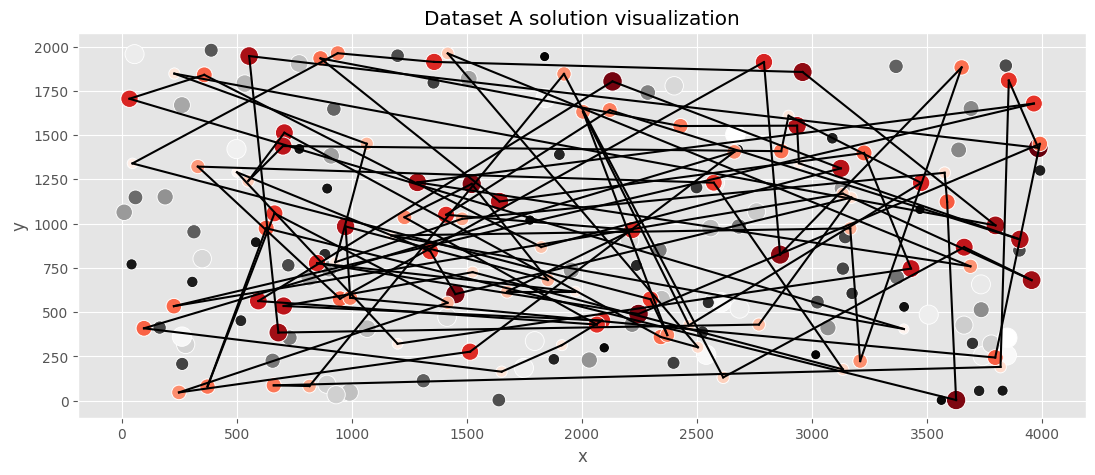

In [21]:
perform_experiment(
    ds_a,
    dm_a,
    "Dataset A solution visualization",
    init_random_solution,
)

#### Dataset B

Best solution: [48, 162, 38, 122, 30, 13, 184, 49, 134, 158, 112, 11, 139, 77, 114, 101, 166, 65, 165, 93, 19, 167, 53, 145, 27, 190, 141, 132, 41, 3, 113, 149, 148, 169, 192, 115, 67, 44, 5, 156, 92, 195, 127, 71, 117, 21, 26, 130, 52, 72, 188, 23, 28, 171, 35, 193, 179, 70, 128, 85, 63, 87, 163, 83, 58, 144, 186, 20, 191, 194, 180, 29, 40, 10, 111, 12, 6, 138, 137, 16, 56, 121, 81, 187, 94, 22, 14, 120, 109, 99, 32, 46, 181, 185, 176, 89, 183, 118, 74, 161]
Objective function statistics:
minimum = 187699
mean = 212675.575
maximum = 244471


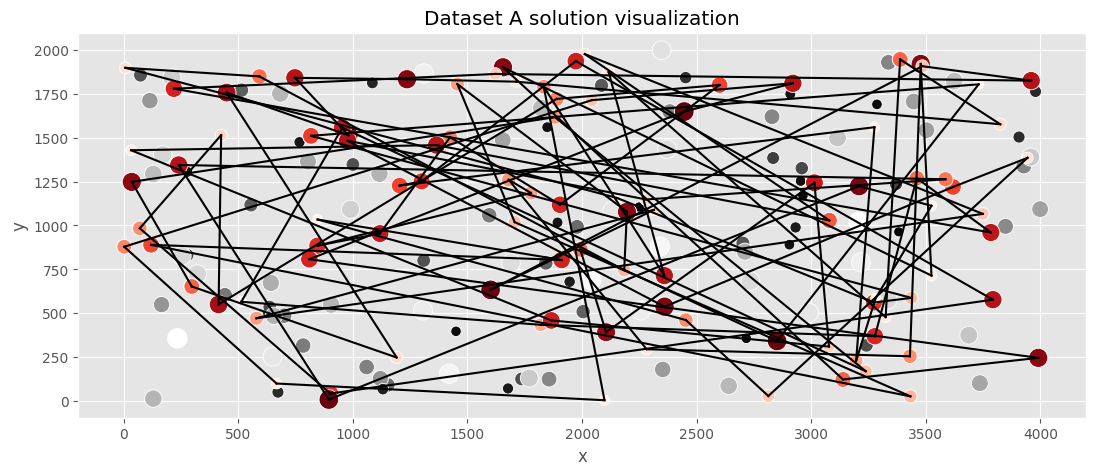

In [13]:
perform_experiment(
    ds_b,
    dm_b,
    "Dataset A solution visualization",
    init_random_solution,
)

## Nearest Neighbors Considering Adding the Node Only at the End of the Current Path

$$
\begin{aligned}
&\textbf{Function init\_nearest\_neighbor\_end}(dataset, distance\_matrix, start\_node): \\
&\quad \text{Calculate subset size as half of the dataset size (rounded)} \\
&\quad \text{Initialize solution with start\_node} \\
&\quad \text{Mark start\_node as visited} \\
&\quad \textbf{While solution size is smaller than subset size}: \\
&\quad \quad \text{Find the last node in the solution} \\
&\quad \quad \text{Calculate distances from the last node to all unvisited nodes} \\
&\quad \quad \text{Select the nearest unvisited node and add it to the solution} \\
&\quad \quad \text{Mark this node as visited} \\
&\quad \textbf{Return} \text{the solution as a subset of the dataset}
\end{aligned}
$$


#### Dataset A

Best solution: [124, 94, 63, 53, 180, 154, 135, 123, 65, 116, 59, 115, 139, 193, 41, 42, 160, 34, 22, 18, 108, 69, 159, 181, 184, 177, 54, 30, 48, 43, 151, 176, 80, 79, 133, 162, 51, 137, 183, 143, 0, 117, 46, 68, 93, 140, 36, 163, 199, 146, 195, 103, 5, 96, 118, 149, 131, 112, 4, 84, 35, 10, 190, 127, 70, 101, 97, 1, 152, 120, 78, 145, 185, 40, 165, 90, 81, 113, 175, 171, 16, 31, 44, 92, 57, 106, 49, 144, 62, 14, 178, 52, 55, 129, 2, 75, 86, 26, 100, 121]
Objective function statistics:
minimum = 83182
mean = 85108.51
maximum = 89433


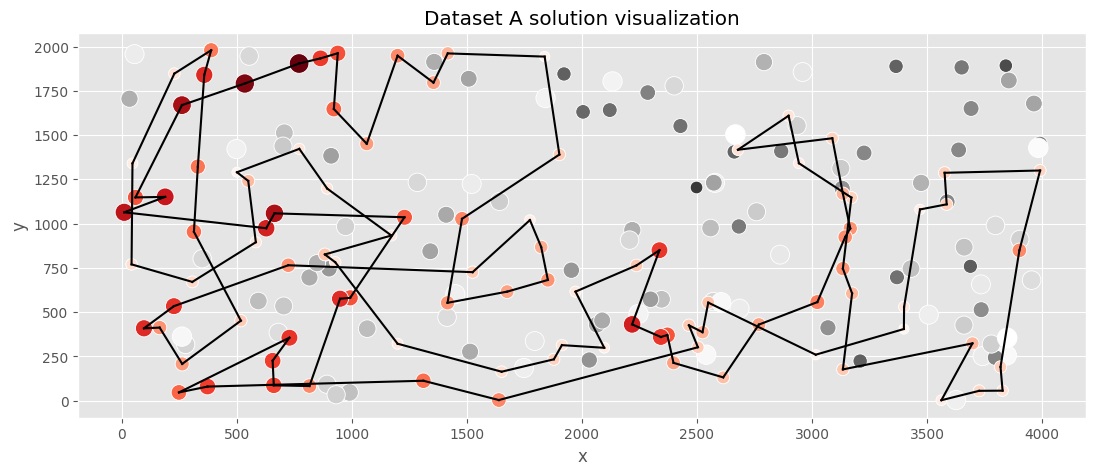

In [14]:
perform_experiment(
    ds_a,
    dm_a,
    "Dataset A solution visualization",
    init_nearest_neighbor_end,
)

#### Dataset B

Best solution: [16, 1, 117, 31, 54, 193, 190, 80, 175, 5, 177, 36, 61, 141, 77, 153, 163, 176, 113, 166, 86, 185, 179, 94, 47, 148, 20, 60, 28, 140, 183, 152, 18, 62, 124, 106, 143, 0, 29, 109, 35, 33, 138, 11, 168, 169, 188, 70, 3, 145, 15, 155, 189, 34, 55, 95, 130, 99, 22, 66, 154, 57, 172, 194, 103, 127, 89, 137, 114, 165, 187, 146, 81, 111, 8, 104, 21, 82, 144, 160, 139, 182, 25, 121, 90, 122, 135, 63, 40, 107, 100, 133, 10, 147, 6, 134, 51, 98, 118, 74]
Objective function statistics:
minimum = 52319
mean = 54390.43
maximum = 59030


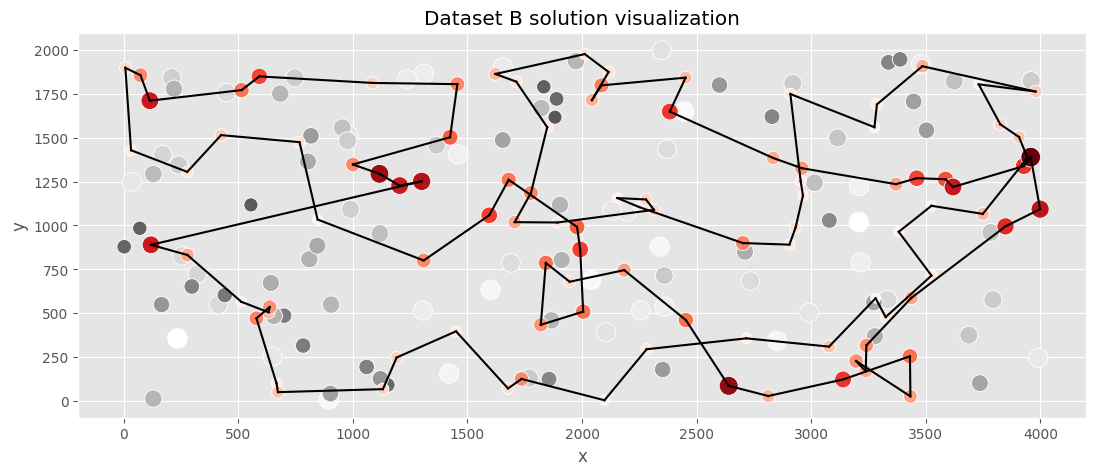

In [15]:
perform_experiment(
    ds_b,
    dm_b,
    "Dataset B solution visualization",
    init_nearest_neighbor_end,
)

## Nearest Neighbors Considering Adding the Node at the Best Position on the Current Path

$$
\begin{aligned}
&\textbf{Function init\_nearest\_neighbor\_best\_position}(dataset, distance\_matrix, start\_node): \\
&\quad \text{Calculate subset size as half of the dataset size (rounded)} \\
&\quad \text{Initialize solution with start\_node} \\
&\quad \text{Initialize remaining\_nodes as all nodes except start\_node} \\
&\quad \textbf{While solution size is smaller than subset size}: \\
&\quad \quad \text{best\_insertion\_cost} \gets \infty \\
&\quad \quad \text{best\_insertion} \gets \text{None} \\
&\quad \quad \textbf{For each node in remaining\_nodes}: \\
&\quad \quad \quad \textbf{For each possible position in the solution}: \\
&\quad \quad \quad \quad \text{Calculate insertion cost of adding the node at the current position} \\
&\quad \quad \quad \quad \textbf{If insertion cost is lower than best\_insertion\_cost}: \\
&\quad \quad \quad \quad \quad \text{Update best\_insertion\_cost and best\_insertion position} \\
&\quad \quad \text{Insert the best\_node into the solution at the best position} \\
&\quad \quad \text{Remove this node from remaining\_nodes} \\
&\quad \textbf{Return} \text{the solution as a subset of the dataset}
\end{aligned}
$$


#### Dataset A

Best solution: [69, 108, 18, 22, 146, 159, 41, 193, 139, 68, 46, 115, 42, 181, 34, 160, 48, 54, 177, 10, 190, 4, 112, 84, 184, 43, 118, 59, 65, 116, 149, 123, 127, 70, 135, 154, 180, 53, 100, 26, 86, 101, 75, 120, 44, 25, 16, 171, 175, 113, 31, 78, 145, 179, 196, 81, 40, 90, 27, 164, 165, 185, 106, 178, 14, 144, 62, 9, 148, 102, 49, 52, 55, 57, 92, 129, 2, 1, 97, 152, 124, 94, 63, 79, 133, 162, 151, 51, 176, 80, 137, 23, 186, 89, 183, 143, 0, 117, 93, 140]
Objective function statistics:
minimum = 71114
mean = 72871.87
maximum = 74875


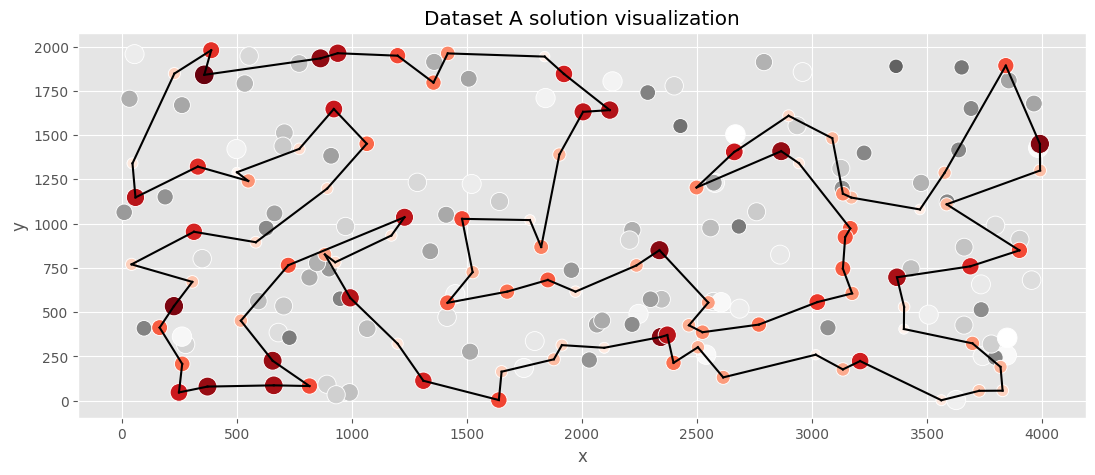

In [16]:
perform_experiment(
    ds_a,
    dm_a,
    "Dataset A solution visualization",
    init_nearest_neighbor_best_position,
)

#### Dataset B

Best solution: [180, 194, 113, 176, 166, 86, 95, 130, 99, 185, 179, 66, 94, 47, 148, 60, 20, 28, 149, 4, 140, 183, 152, 170, 34, 55, 18, 62, 124, 106, 143, 35, 0, 29, 109, 111, 82, 8, 104, 144, 160, 33, 138, 11, 139, 168, 195, 13, 145, 15, 155, 3, 70, 132, 169, 188, 6, 147, 90, 51, 121, 131, 122, 135, 107, 40, 63, 38, 27, 1, 156, 198, 117, 193, 31, 54, 73, 136, 190, 80, 175, 78, 5, 177, 21, 36, 61, 91, 141, 77, 81, 153, 187, 163, 89, 127, 103, 114, 137, 165]
Objective function statistics:
minimum = 44762
mean = 47575.555
maximum = 49919


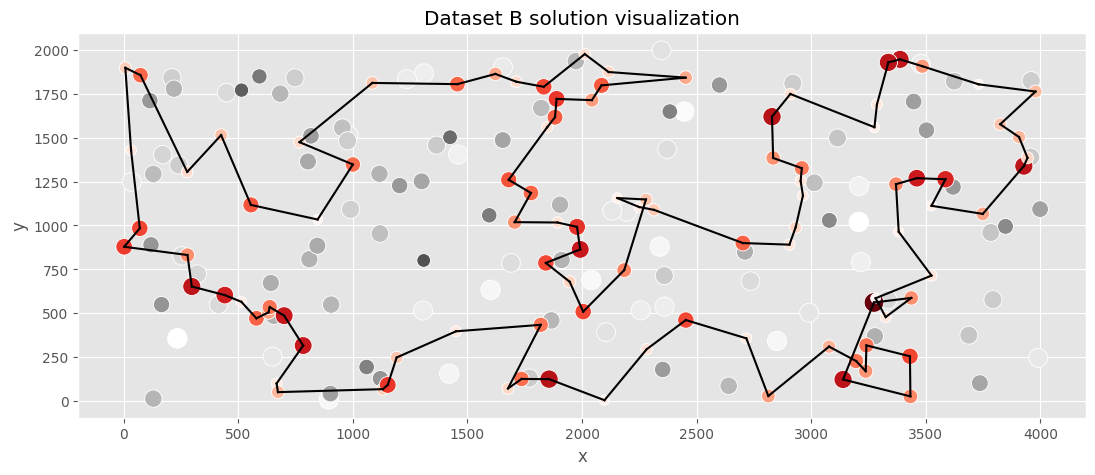

In [17]:
perform_experiment(
    ds_b,
    dm_b,
    "Dataset B solution visualization",
    init_nearest_neighbor_best_position,
)

## Greedy Cycle


$$
\begin{aligned}
&\textbf{Function init\_greedy\_cycle}(dataset, distance\_matrix, start\_node): \\
&\quad \text{Calculate subset size as half of the dataset size (rounded)} \\
&\quad \text{Initialize solution with start\_node} \\
&\quad \text{Find the nearest node to start\_node and add it to solution} \\
&\quad \text{Remove this node from remaining\_nodes} \\
&\quad \textbf{While solution size is smaller than subset size}: \\
&\quad \quad \text{best\_insertion\_cost} \gets \infty \\
&\quad \quad \text{best\_insertion} \gets \text{None} \\
&\quad \quad \textbf{For each node in remaining\_nodes}: \\
&\quad \quad \quad \textbf{For each possible insertion point in the solution}: \\
&\quad \quad \quad \quad \text{Calculate insertion cost of adding the node at the current position, excluding closing edge} \\
&\quad \quad \quad \quad \textbf{If insertion cost is lower than best\_insertion\_cost}: \\
&\quad \quad \quad \quad \quad \text{Update best\_insertion\_cost and best\_insertion position} \\
&\quad \quad \text{Insert the best\_node into the solution at the best position} \\
&\quad \quad \text{Remove this node from remaining\_nodes} \\
&\quad \textbf{Return} \text{the solution as a subset of the dataset}
\end{aligned}
$$

#### Dataset A

Best solution: [0, 117, 143, 183, 89, 186, 23, 137, 176, 80, 79, 94, 63, 152, 97, 1, 2, 129, 92, 57, 55, 52, 49, 102, 148, 9, 62, 144, 14, 178, 106, 185, 165, 21, 7, 164, 27, 90, 40, 81, 196, 179, 145, 78, 31, 113, 175, 171, 16, 25, 44, 120, 75, 101, 86, 26, 100, 53, 180, 154, 135, 70, 127, 123, 162, 133, 151, 51, 118, 59, 149, 131, 65, 116, 43, 184, 35, 84, 112, 4, 190, 10, 177, 54, 48, 160, 34, 181, 42, 115, 41, 193, 159, 146, 22, 18, 108, 139, 68, 46]
Objective function statistics:
minimum = 71263
mean = 72071.915
maximum = 73154


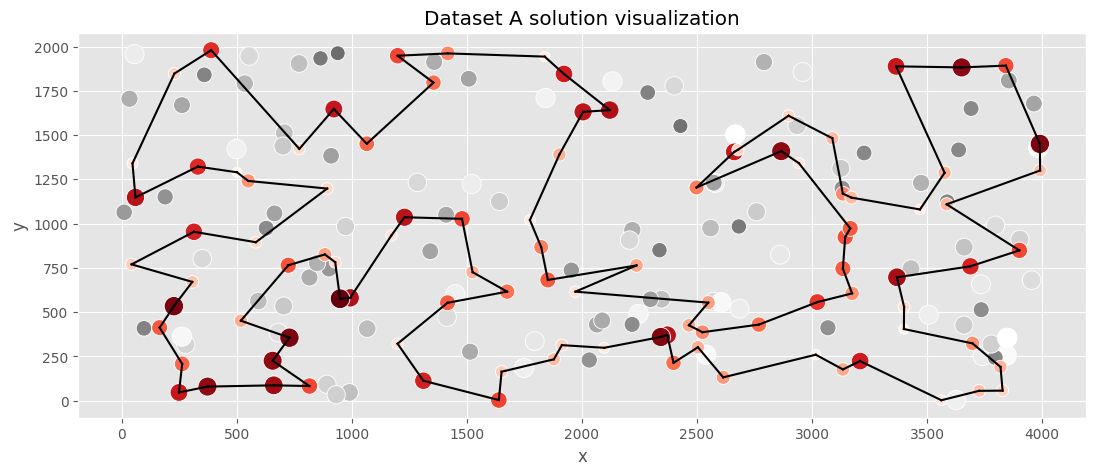

In [18]:
perform_experiment(
    ds_a,
    dm_a,
    "Dataset A solution visualization",
    init_greedy_cycle,
)

#### Dataset B

Best solution: [4, 149, 28, 20, 60, 148, 47, 94, 66, 179, 185, 99, 130, 95, 86, 166, 194, 113, 176, 103, 114, 137, 127, 89, 163, 187, 153, 81, 77, 141, 91, 61, 36, 175, 78, 45, 5, 177, 21, 82, 111, 8, 104, 138, 11, 139, 182, 25, 136, 80, 190, 73, 54, 31, 193, 117, 198, 156, 1, 121, 51, 90, 131, 135, 63, 40, 107, 122, 133, 10, 147, 6, 188, 169, 132, 70, 3, 155, 15, 145, 13, 195, 168, 33, 160, 29, 0, 109, 35, 143, 106, 124, 62, 18, 55, 34, 170, 152, 183, 140]
Objective function statistics:
minimum = 45312
mean = 46903.73
maximum = 48623


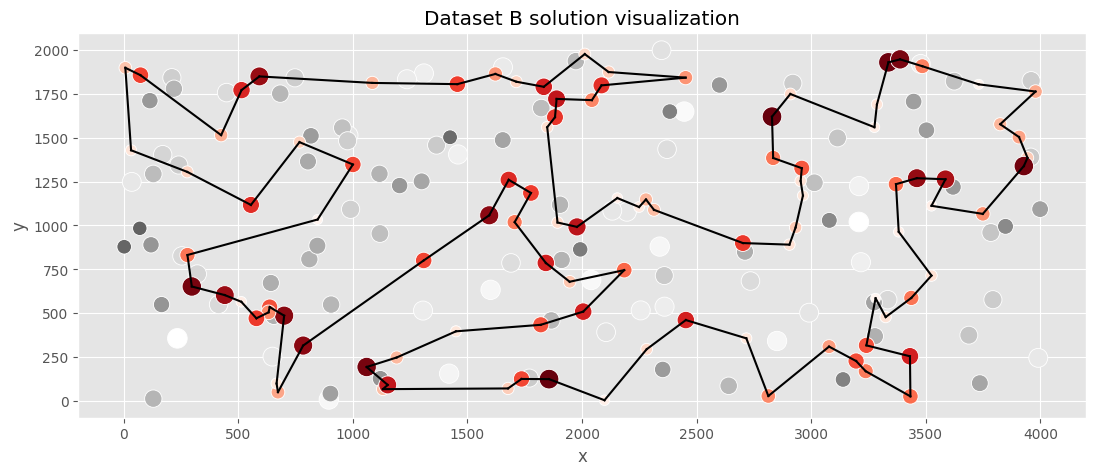

In [19]:
perform_experiment(
    ds_b,
    dm_b,
    "Dataset B solution visualization",
    init_greedy_cycle,
)

## Conclusions

Overall, on the provided problem and data sets, the greedy cycle algorithm proved to be the most efficient on mean, however "NN" best position had lower minimum.